# Analyze and Plot Traffic Logs produced by `iptraf`

In [45]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

## Open and parse log file

In [2]:
log_file_path = "./iptraf_log.txt"

In [3]:
iptraf_df = pd.read_csv(log_file_path, 
                        sep=';',
                        header=0,  # Override first row
                        names=['timestamp', 'type', 'interface', 'num_bytes', 'src/dst'],
                        on_bad_lines='skip'
                       ).iloc[:-1] # Ignore last row

In [4]:
iptraf_df

,timestamp,type,interface,num_bytes,src/dst
0,Thu Nov 17 21:57:04 2022,UDP,h1-eth0,1278 bytes,from 10.0.0.1:58695 to 10.0.0.2:6121
1,Thu Nov 17 21:57:04 2022,UDP,h1-eth0,1278 bytes,from 10.0.0.1:42883 to 10.0.0.2:6121
2,Thu Nov 17 21:57:04 2022,UDP,h1-eth0,1278 bytes,from 10.0.0.1:58695 to 10.0.0.2:6121
3,Thu Nov 17 21:57:04 2022,UDP,h1-eth0,1278 bytes,from 10.0.0.1:42883 to 10.0.0.2:6121
4,Thu Nov 17 21:57:45 2022,UDP,h1-eth0,1278 bytes,from 10.0.0.1:60023 to 10.0.0.2:6121
...,...,...,...,...,...
169806,Thu Nov 17 22:03:55 2022,UDP,h1-eth0,62 bytes,from 10.0.0.1:51353 to 10.0.0.2:6121
169807,Thu Nov 17 22:03:55 2022,UDP,h1-eth0,54 bytes,from 10.0.0.2:6121 to 10.0.0.1:51353
169808,Thu Nov 17 22:03:55 2022,UDP,h1-eth0,62 bytes,from 10.0.0.1:51353 to 10.0.0.2:6121
169809,Thu Nov 17 22:03:55 2022,UDP,h1-eth0,54 bytes,from 10.0.0.2:6121 to 10.0.0.1:51353


## Preprocess

### Parse datetime

In [5]:
datetime_format = '%a %b %d %H:%M:%S %Y'

iptraf_datetime_df = iptraf_df.copy(deep=True)
iptraf_datetime_df['timestamp'] = iptraf_datetime_df['timestamp'].apply(lambda time_str: datetime.strptime(time_str, datetime_format))
iptraf_datetime_df

,timestamp,type,interface,num_bytes,src/dst
0,2022-11-17 21:57:04,UDP,h1-eth0,1278 bytes,from 10.0.0.1:58695 to 10.0.0.2:6121
1,2022-11-17 21:57:04,UDP,h1-eth0,1278 bytes,from 10.0.0.1:42883 to 10.0.0.2:6121
2,2022-11-17 21:57:04,UDP,h1-eth0,1278 bytes,from 10.0.0.1:58695 to 10.0.0.2:6121
3,2022-11-17 21:57:04,UDP,h1-eth0,1278 bytes,from 10.0.0.1:42883 to 10.0.0.2:6121
4,2022-11-17 21:57:45,UDP,h1-eth0,1278 bytes,from 10.0.0.1:60023 to 10.0.0.2:6121
...,...,...,...,...,...
169806,2022-11-17 22:03:55,UDP,h1-eth0,62 bytes,from 10.0.0.1:51353 to 10.0.0.2:6121
169807,2022-11-17 22:03:55,UDP,h1-eth0,54 bytes,from 10.0.0.2:6121 to 10.0.0.1:51353
169808,2022-11-17 22:03:55,UDP,h1-eth0,62 bytes,from 10.0.0.1:51353 to 10.0.0.2:6121
169809,2022-11-17 22:03:55,UDP,h1-eth0,54 bytes,from 10.0.0.2:6121 to 10.0.0.1:51353


### Parse source and destination

In [24]:
def parse_src_dst(src_dst):
    fileds = src_dst.strip().split(' ')
    src, dst = fileds[1], fileds[3]
    src_ip, src_port = src.split(':')
    dst_ip, dst_port = dst.split(':')
    return pd.Series([src_ip, int(src_port), dst_ip, int(dst_port)])

In [25]:
iptraf_srcdst_df = iptraf_datetime_df.copy(deep=True)
iptraf_srcdst_df = iptraf_datetime_df['src/dst'].apply(parse_src_dst)
iptraf_srcdst_df.columns = ['src_ip', 'src_port', 'dst_ip', 'dst_port']

iptraf_srcdst_df = pd.concat([iptraf_datetime_df.drop(labels='src/dst', axis=1),
                              iptraf_srcdst_df], axis=1)
iptraf_srcdst_df

,timestamp,type,interface,num_bytes,src_ip,src_port,dst_ip,dst_port
0,2022-11-17 21:57:04,UDP,h1-eth0,1278 bytes,10.0.0.1,58695,10.0.0.2,6121
1,2022-11-17 21:57:04,UDP,h1-eth0,1278 bytes,10.0.0.1,42883,10.0.0.2,6121
2,2022-11-17 21:57:04,UDP,h1-eth0,1278 bytes,10.0.0.1,58695,10.0.0.2,6121
3,2022-11-17 21:57:04,UDP,h1-eth0,1278 bytes,10.0.0.1,42883,10.0.0.2,6121
4,2022-11-17 21:57:45,UDP,h1-eth0,1278 bytes,10.0.0.1,60023,10.0.0.2,6121
...,...,...,...,...,...,...,...,...
169806,2022-11-17 22:03:55,UDP,h1-eth0,62 bytes,10.0.0.1,51353,10.0.0.2,6121
169807,2022-11-17 22:03:55,UDP,h1-eth0,54 bytes,10.0.0.2,6121,10.0.0.1,51353
169808,2022-11-17 22:03:55,UDP,h1-eth0,62 bytes,10.0.0.1,51353,10.0.0.2,6121
169809,2022-11-17 22:03:55,UDP,h1-eth0,54 bytes,10.0.0.2,6121,10.0.0.1,51353


### Parse num bytes

In [26]:
iptraf_num_bytes_df = iptraf_srcdst_df.copy(deep=True)

iptraf_num_bytes_df['num_bytes'] = iptraf_num_bytes_df['num_bytes'].apply(
    lambda byte_str: int(byte_str.strip().split(' ')[0])
)
iptraf_num_bytes_df

,timestamp,type,interface,num_bytes,src_ip,src_port,dst_ip,dst_port
0,2022-11-17 21:57:04,UDP,h1-eth0,1278,10.0.0.1,58695,10.0.0.2,6121
1,2022-11-17 21:57:04,UDP,h1-eth0,1278,10.0.0.1,42883,10.0.0.2,6121
2,2022-11-17 21:57:04,UDP,h1-eth0,1278,10.0.0.1,58695,10.0.0.2,6121
3,2022-11-17 21:57:04,UDP,h1-eth0,1278,10.0.0.1,42883,10.0.0.2,6121
4,2022-11-17 21:57:45,UDP,h1-eth0,1278,10.0.0.1,60023,10.0.0.2,6121
...,...,...,...,...,...,...,...,...
169806,2022-11-17 22:03:55,UDP,h1-eth0,62,10.0.0.1,51353,10.0.0.2,6121
169807,2022-11-17 22:03:55,UDP,h1-eth0,54,10.0.0.2,6121,10.0.0.1,51353
169808,2022-11-17 22:03:55,UDP,h1-eth0,62,10.0.0.1,51353,10.0.0.2,6121
169809,2022-11-17 22:03:55,UDP,h1-eth0,54,10.0.0.2,6121,10.0.0.1,51353


## Find communication groups

In [27]:
processed_df = iptraf_num_bytes_df

In [28]:
# Find set of IPs
processed_df['src_ip'].unique()

array(['10.0.0.1', '10.0.0.2'], dtype=object)

In [62]:
# Choose the src IP to filter
src_ip = '10.0.0.1'

# Find set of Ports
src_ip_df = processed_df.loc[processed_df['src_ip'] == src_ip]
src_ip_df['src_port'].unique()

array([58695, 42883, 60023, 51616, 55425, 48165, 39654, 51353, 44583,
       36841, 58573, 41481, 60373, 40426, 35908, 54315], dtype=int64)

In [76]:
# Choose a src port to view
src_port = 39654

src_ip_port_df = src_ip_df.loc[src_ip_df['src_port'] == src_port]
src_ip_port_df

,timestamp,type,interface,num_bytes,src_ip,src_port,dst_ip,dst_port
21664,2022-11-17 21:58:38,UDP,h1-eth0,1278,10.0.0.1,39654,10.0.0.2,6121
21675,2022-11-17 21:58:38,UDP,h1-eth0,1278,10.0.0.1,39654,10.0.0.2,6121
21679,2022-11-17 21:58:38,UDP,h1-eth0,194,10.0.0.1,39654,10.0.0.2,6121
21681,2022-11-17 21:58:38,UDP,h1-eth0,96,10.0.0.1,39654,10.0.0.2,6121
21697,2022-11-17 21:58:38,UDP,h1-eth0,183,10.0.0.1,39654,10.0.0.2,6121
...,...,...,...,...,...,...,...,...
167256,2022-11-17 22:03:54,UDP,h1-eth0,62,10.0.0.1,39654,10.0.0.2,6121
167268,2022-11-17 22:03:54,UDP,h1-eth0,61,10.0.0.1,39654,10.0.0.2,6121
167283,2022-11-17 22:03:54,UDP,h1-eth0,62,10.0.0.1,39654,10.0.0.2,6121
167319,2022-11-17 22:03:54,UDP,h1-eth0,62,10.0.0.1,39654,10.0.0.2,6121


In [82]:
# Groupby timestamp
example_group_df = src_ip_port_df.groupby(by='timestamp').mean(numeric_only=True)
example_group_df = example_group_df['num_bytes']
example_group_df

timestamp
2022-11-17 21:58:38    154.032258
2022-11-17 21:58:39     61.000000
2022-11-17 21:58:40     61.444444
2022-11-17 21:58:41     62.625000
2022-11-17 21:58:42     61.200000
                          ...    
2022-11-17 22:03:50     63.225352
2022-11-17 22:03:51     63.185714
2022-11-17 22:03:52     63.121622
2022-11-17 22:03:53     62.600000
2022-11-17 22:03:54     63.692308
Name: num_bytes, Length: 314, dtype: float64

In [95]:
src_port2 = 40426
src_ip_port_df2 = src_ip_df.loc[src_ip_df['src_port'] == src_port2]
example_group_df2 = src_ip_port_df2.groupby(by='timestamp').mean(numeric_only=True)
example_group_df2 = example_group_df2['num_bytes']

example_group_df2

timestamp
2022-11-17 21:58:38    710.250000
2022-11-17 21:58:39     71.909091
2022-11-17 21:58:40     61.176471
2022-11-17 21:58:41     61.642857
2022-11-17 21:58:42     62.636364
                          ...    
2022-11-17 22:03:39    119.000000
2022-11-17 22:03:40    104.000000
2022-11-17 22:03:41     90.263158
2022-11-17 22:03:42     74.300000
2022-11-17 22:03:43     91.000000
Name: num_bytes, Length: 303, dtype: float64

In [96]:
example_merge_group_df = pd.concat([example_group_df, example_group_df2], axis=1, names=['num_bytes_1', 'num_bytes_2']).fillna(0)
example_merge_group_df

,num_bytes,num_bytes
timestamp,,
2022-11-17 21:58:38,154.032258,710.250000
2022-11-17 21:58:39,61.000000,71.909091
2022-11-17 21:58:40,61.444444,61.176471
2022-11-17 21:58:41,62.625000,61.642857
2022-11-17 21:58:42,61.200000,62.636364
...,...,...
2022-11-17 22:03:50,63.225352,0.000000
2022-11-17 22:03:51,63.185714,0.000000
2022-11-17 22:03:52,63.121622,0.000000


### Plot this group

In [97]:
group_num_bytes = example_merge_group_df['num_bytes'].to_numpy()
group_num_bytes.shape

(314, 2)

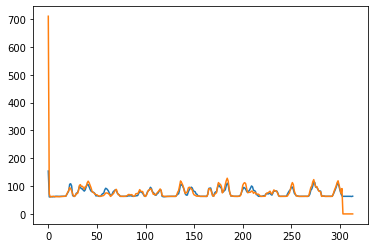

In [98]:
plt.plot(group_num_bytes)
plt.show()

## Plot all groups

In [110]:
src_ip_port_df = processed_df.loc[processed_df['src_ip'] == src_ip]
src_port_list = src_ip_port_df['src_port'].unique()

group_df_list = []
for src_port in src_port_list:
    filter_df = src_ip_port_df.loc[src_ip_port_df['src_port'] == src_port]
    group_df = filter_df.groupby(by='timestamp').mean(numeric_only=True)['num_bytes']
    group_df_list.append(group_df)
    
len(group_df_list)

16

In [112]:
# Concat all of them
cat_df = pd.concat(group_df_list, axis=1).fillna(0)
cat_df

,num_bytes,num_bytes,num_bytes,num_bytes,num_bytes,num_bytes,num_bytes,num_bytes,num_bytes,num_bytes,num_bytes,num_bytes,num_bytes,num_bytes,num_bytes,num_bytes
timestamp,,,,,,,,,,,,,,,,
2022-11-17 21:57:04,1278.0,1278.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
2022-11-17 21:57:45,0.0,0.0,1278.0,1278.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
2022-11-17 21:58:07,0.0,0.0,0.0,0.0,76.556180,86.721739,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
2022-11-17 21:58:08,0.0,0.0,0.0,0.0,62.006494,61.912621,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
2022-11-17 21:58:09,0.0,0.0,0.0,0.0,62.102041,62.078947,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-17 22:03:51,0.0,0.0,0.0,0.0,0.000000,0.000000,63.185714,63.257143,63.166667,0.0,0.0,0.0,62.290323,0.0,0.0,62.366667
2022-11-17 22:03:52,0.0,0.0,0.0,0.0,0.000000,0.000000,63.121622,63.242105,63.553571,0.0,0.0,0.0,62.233333,0.0,0.0,63.687500
2022-11-17 22:03:53,0.0,0.0,0.0,0.0,0.000000,0.000000,62.600000,62.944099,0.000000,0.0,0.0,0.0,61.742857,0.0,0.0,0.000000


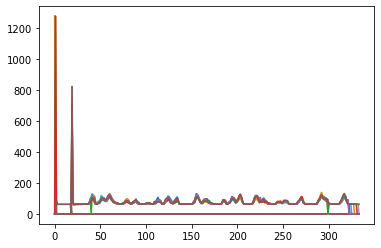

In [113]:
plt.plot(cat_df['num_bytes'].to_numpy())
plt.show()